<a href="https://colab.research.google.com/github/JanuNandhini/24ADI003-ex-4-24BAD041/blob/main/MULTINOMIAL_NA%C3%8FVE_BAYES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
df=pd.read_csv("/content/spam.csv", encoding='latin-1')
df=df[['v1', 'v2']]
df.columns=['label', 'message']

df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
def clean_text(text):
    text=text.lower()  # convert to lowercase
    text=re.sub(r'[^a-zA-Z\s]', '', text)  # remove punctuation & numbers
    return text

df['message']=df['message'].apply(clean_text)
df.head()

,label,message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in a wkly comp to win fa cup final...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...


In [4]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['message'])
print(X)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 40985 stored elements and shape (5572, 8245)>
  Coords	Values
  (0, 3613)	1
  (0, 5312)	1
  (0, 1500)	1
  (0, 457)	1
  (0, 896)	1
  (0, 2841)	1
  (0, 7993)	1
  (0, 3765)	1
  (0, 894)	1
  (0, 1220)	1
  (0, 2802)	1
  (0, 229)	1
  (0, 7763)	1
  (1, 4875)	1
  (1, 3801)	1
  (1, 3581)	1
  (1, 7887)	1
  (1, 4906)	1
  (2, 2541)	1
  (2, 2144)	2
  (2, 7944)	1
  (2, 1335)	1
  (2, 7901)	1
  (2, 2272)	2
  (2, 1556)	1
  :	:
  (5567, 4372)	1
  (5567, 2037)	1
  (5567, 5375)	1
  (5567, 882)	1
  (5568, 3133)	1
  (5568, 2763)	1
  (5568, 2528)	1
  (5568, 2172)	1
  (5569, 4469)	1
  (5569, 5235)	1
  (5569, 6465)	1
  (5569, 6837)	1
  (5570, 2541)	1
  (5570, 3282)	1
  (5570, 3915)	1
  (5570, 7813)	1
  (5570, 1792)	1
  (5570, 2658)	1
  (5570, 930)	1
  (5570, 3414)	1
  (5570, 2905)	1
  (5570, 60)	1
  (5570, 691)	1
  (5571, 7374)	1
  (5571, 5928)	1


In [5]:
le=LabelEncoder()
y=le.fit_transform(df['label'])
print(y)

[0 0 1 ... 0 0 0]


In [7]:
X_train, X_test, y_train, y_test=train_test_split(
    X, y, test_size=0.2, random_state=42)
model=MultinomialNB(alpha=1.0)
model.fit(X_train, y_train)

MultinomialNB()

In [8]:
y_pred=model.predict(X_test)
print(y_pred)

[1 0 1 ... 0 0 1]


In [9]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.9704035874439462
Precision: 0.8726114649681529
Recall: 0.9133333333333333
F1 Score: 0.8925081433224755


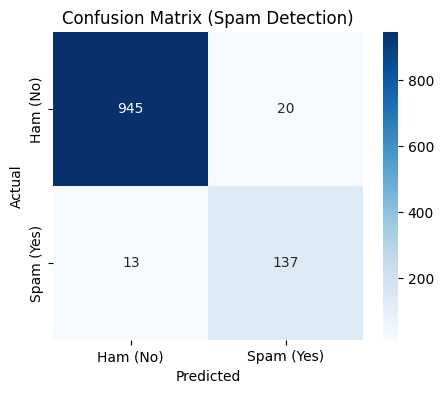

In [10]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=['Ham (No)', 'Spam (Yes)'],
            yticklabels=['Ham (No)', 'Spam (Yes)'],
            cmap='Blues')

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Spam Detection)")
plt.show()

In [11]:
feature_names=vectorizer.get_feature_names_out()
spam_indices=np.argsort(model.feature_log_prob_[1])[-10:]

print("Top words influencing Spam:")
for i in spam_indices:
    print(feature_names[i])

Top words influencing Spam:
just
prize
reply
text
claim
stop
mobile
ur
txt
free


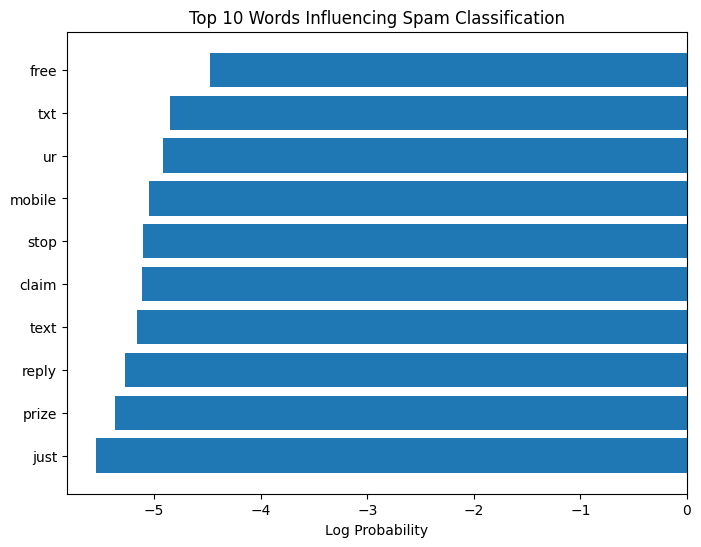

In [12]:
feature_names = vectorizer.get_feature_names_out()

# Get spam class probabilities
spam_probs = model.feature_log_prob_[1]

# Get top 10 spam words
top_indices = np.argsort(spam_probs)[-10:]
top_words = feature_names[top_indices]
top_values = spam_probs[top_indices]

plt.figure(figsize=(8,6))
plt.barh(top_words, top_values)
plt.xlabel("Log Probability")
plt.title("Top 10 Words Influencing Spam Classification")
plt.show()

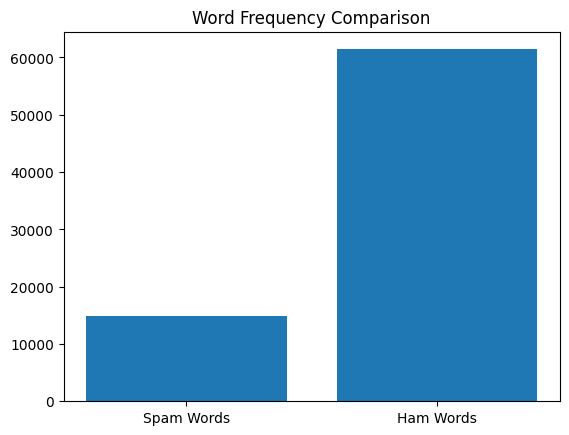

In [13]:
spam_messages = df[df['label'] == 'spam']['message']
ham_messages = df[df['label'] == 'ham']['message']

spam_vector = CountVectorizer().fit_transform(spam_messages)
ham_vector = CountVectorizer().fit_transform(ham_messages)

spam_counts = np.sum(spam_vector.toarray(), axis=0)
ham_counts = np.sum(ham_vector.toarray(), axis=0)

plt.bar(['Spam Words', 'Ham Words'],
        [sum(spam_counts), sum(ham_counts)])
plt.title("Word Frequency Comparison")
plt.show()

In [14]:
misclassified = np.where(y_test != y_pred)

print("Some Misclassified Examples:\n")
for i in misclassified[0][:5]:
    print("Message:", df.iloc[i]['message'])
    print("Actual:", y_test[i], "Predicted:", y_pred[i])
    print("-----------")

Some Misclassified Examples:

Message: go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
Actual: 0 Predicted: 1
-----------
Message: k tell me anything about you
Actual: 1 Predicted: 0
-----------
Message: k did you call me just now ah 
Actual: 0 Predicted: 1
-----------
Message: for real when u getting on yo i only need  more tickets and one more jacket and im done i already used all my multis
Actual: 0 Predicted: 1
-----------
Message: okay name ur price as long as its legal wen can i pick them up y u ave x ams xx
Actual: 0 Predicted: 1
-----------


In [15]:
model2 = MultinomialNB(alpha=0.1)
model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)

print("New Accuracy:", accuracy_score(y_test, y_pred2))

New Accuracy: 0.9668161434977578
